# BEE 4750 Homework 2: Dissolved Oxygen

**Name**: Christine Swanson

**ID**: cms549

> **Due Date**
>
> Friday, 09/22/23, 9:00pm

## Overview

### Instructions

This assignment asks you to use a simulation model for dissolved oxygen
to assess the impacts of two wastewater streams, including minimum
treatment levels and the impact of uncertain environmental conditions.
You will also be asked to identify a minimum distance for the addition
of a third discharge stream.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `c:\Users\chris\Box\classwork\2023_Fall\BEE5750\hw\hw02-christinemswanson`

   Installed Calculus ──────────────── v0.5.1


   Installed Rmath ─────────────────── v0.7.1
   Installed Rmath_jll ─────────────── v0.4.0+0
   Installed FillArrays ────────────── v1.4.1
   Installed PDMats ────────────────── v0.11.17
   Installed DualNumbers ───────────── v0.6.8
   Installed StatsFuns ─────────────── v1.3.0
   Installed HypergeometricFunctions ─ v0.3.21


   Installed QuadGK ────────────────── v2.8.2


   Installed Distributions ─────────── v0.25.98


Precompiling 

project...

  ✓ Calculus
  ✓ PDMats


  ✓ Rmath_jll


  ✓ FillArrays


  ✓ QuadGK


  ✓ Rmath


  ✓ DualNumbers


  ✓ HypergeometricFunctions


  ✓ StatsFuns


  ✓ Distributions


  10 dependencies successfully precompiled in 27 seconds. 140 already precompiled.


In [10]:
using Plots
using LaTeXStrings
using Distributions
using Statistics

## Problems (Total: 40 Points)

A river which flows at 6 km/d is receiving waste discharges from two
sources which are 15 km apart, as shown in
<a href="#fig-river" class="quarto-xref">Figure 1</a>. The oxygen
reaeration rate is 0.55 day<sup>-1</sup>, and the decay rates of CBOD
and NBOD are are 0.35 and 0.25 day<sup>-1</sup>, respectively. The
river’s saturated dissolved oxygen concentration is 10m g/L.

![Figure 1: Schematic of the
system](attachment:figures/river_diagram.png)

### Problem 1 (8 points)

If the characteristics of the river inflow and waste discharges are
given in <a href="#tbl-river" class="quarto-xref">Table 1</a>, write a
Julia model to compute the dissolved oxygen concentration from the first
wastewater discharge to an arbitrary distance `d` km downstream. Use
your model to compute the maximum dissolved oxygen concentration up to
50km downstream and how far downriver this maximum occurs.

|    Parameter     |            River Inflow |         Waste Stream 1 |         Waste Stream 2 |
|:----------------:|------------------------:|-----------------------:|-----------------------:|
|      Inflow      | 100,000 m<sup>3</sup>/d | 10,000 m<sup>3</sup>/d | 15,000 m<sup>3</sup>/d |
| DO Concentration |                7.5 mg/L |                 5 mg/L |                 5 mg/L |
|       CBOD       |                  5 mg/L |                50 mg/L |                45 mg/L |
|       NBOD       |                  5 mg/L |                35 mg/L |                35 mg/L |

Table 1: River inflow and waste stream characteristics for Problem 1.

In [1]:
# DO model (this only works for single discharge point, not 2)

function dissolved_oxygen(x, Cs, C0, B0, N0, ka, kc, kn, U)
    a1 = exp(-ka * x / U)
    a2 = (kc / (ka - kc)) * (exp(-kc * x / U) - a1)
    a3 = (kn / (ka - kn)) * (exp(-kn * x / U) - a1)
    C = (Cs * (1 - a1)) + (C0 * a1) - (B0 * a2) - (N0 * a3)
    return C
end

dissolved_oxygen (generic function with 1 method)

In [16]:
x = 0:0.1:15
C_1 = (y -> dissolved_oxygen(y, 10, 7.27, 9.09, 7.73, 0.55, 0.35, 0.25, 6)).(x)

151-element Vector{Float64}:
 7.27
 7.210287468684139
 7.151558941408789
 7.093803105773068
 7.037008765254879
 6.981164838083742
 6.92626035612431
 6.872284463770458
 6.81922641684984
 6.767075581538838
 ⋮
 4.82507303239822
 4.831600254132351
 4.838275237864572
 4.84509555153357
 4.8520587910659625
 4.859162580089342
 4.866404569648054
 4.873782437921795
 4.881293889946921

In [17]:
maximum(C_1)

7.27

In [18]:
# from waste point 2 to end
x = 15:0.1:50
C_2 = (y -> dissolved_oxygen(y, 10, 7.17, 10.2, 8.91, 0.55, 0.35, 0.25, 6)).(x)

351-element Vector{Float64}:
 4.259681569822657
 4.267703180317181
 4.275876859253367
 4.284200044938762
 4.292670205318812
 4.301284837672366
 4.310041468310125
 4.318937652276026
 4.327970973051562
 4.33713904226294
 ⋮
 8.278927940056272
 8.286536432693227
 8.29411471509366
 8.301662867563945
 8.309180970677827
 8.316669105268723
 8.324127352422115
 8.331555793468082
 8.33895450997387

In [19]:
maximum(C_2)

8.33895450997387

So it looks like the maximum discharge value is 8.33 mg/L, and this occurs at 50 km downstream? This can't be right...

### Problem 2 (4 points)

Use your model to plot the dissolved oxygen concentration in the river
from the first waste stream to 50km downstream. What do you notice?

In [23]:
# append the 2 vectors together
C_combined = [C_1; C_2];

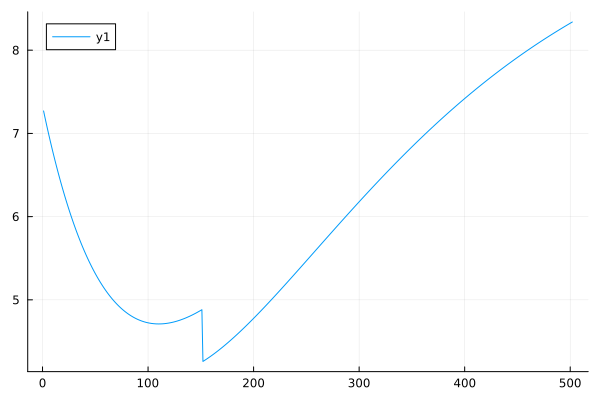

In [28]:
# plot [DO] versus distance downstream
# need to label this plot once I have it correct 
plot(C_combined)

### Problem 3 (3 points)

Under the assumptions of Problem 1, determine the distance from waste
stream 2 it will take for the dissolved oxygen concentration of the
river to recover to 6 mg/L.

### Problem 4 (5 points)

What is the minimum level of treatment (% removal of organic waste) for
waste stream 2 that will ensure that the dissolved oxygen concentration
never drops below 4 mg/L, assuming that waste stream 1 remains
untreated?

### Problem 5 (5 points)

If both waste streams are treated equally, what is the minimum level of
treatment (% removal of organic waste) for the two sources required to
ensure that the dissolved oxygen concentration never drops below 4 mg/L?

### Problem 6 (5 points)

Suppose you are responsible for designing a waste treatment plan for
discharges into the river, with a regulatory mandate to keep the
dissolved oxygen concentration above 4 mg/L. Discuss whether you’d opt
to treat waste stream 2 alone or both waste streams equally. What other
information might you need to make a conclusion, if any?

### Problem 7 (5 points)

Suppose that it is known that the DO concentrations at the river inflow
can vary uniformly between 6 mg/L and 8 mg/L. How often will the
treatment plan identified in Problem 5 (both waste streams treated
equally) fail to comply with the regulatory standard?

### Problem 8 (5 points)

A factory is planning a third wastewater discharge into the river
downstream of the second plant. This discharge would consist of 5
m<sup>3</sup>/day of wastewater with a dissolved oxygen content of 4.5
mg/L and CBOD and NBOD levels of 50 and 45 mg/L, respectively.

Assume that the treatment plan you identified in Problem 5 is still in
place for the existing discharges. If the third discharge will not be
treated, under the original inflow conditions (7.5 mg/L DO), how far
downstream from the second discharge does this third discharge need to
be placed to keep the river concentration from dropping below 4 mg/L?

## References

List any external references consulted, including classmates.